In [656]:
import numpy as np
import pandas as pd       ### numpy and pandas libraries used for analysis
import matplotlib         ## for visualization
from matplotlib import pyplot as plt
import scipy
from scipy import stats
from scipy.stats import binom,poisson, norm ,t

import seaborn as sns       ## for visualization
import pylab 
from pylab import legend, plot, show, title, xlabel, ylabel   ### for plotting the graphs
import seaborn as sns
from numpy import random


In [132]:
dfApp=pd.read_csv(r'EDA_EXAM/application_data.csv')

In [134]:
dfApp.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [136]:
t1=dfApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [138]:
####### to know the data shape that tells how many rows and columns are present
dfApp.shape

(307511, 122)

In [140]:
##### knowing the columns
dfApp.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

In [142]:
df_prev=pd.read_csv(r'EDA_EXAM/previous_application (1).csv')

In [144]:
df_prev.shape

(1670214, 37)

# Checking the columns after importing the data for both the dataset

In [146]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [148]:
dfApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [150]:
t1=list(dfApp)
for i in t1:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [152]:
# For numerical columns
print(df_prev.describe().transpose())

# For categorical/object columns
print(df_prev.describe(include=['object']).transpose())


                               count          mean            std           min           25%           50%           75%          max
SK_ID_PREV                 1670214.0  1.923089e+06  532597.958696  1.000001e+06  1.461857e+06  1.923110e+06  2.384280e+06  2845382.000
SK_ID_CURR                 1670214.0  2.783572e+05  102814.823849  1.000010e+05  1.893290e+05  2.787145e+05  3.675140e+05   456255.000
AMT_ANNUITY                1297979.0  1.595512e+04   14782.137335  0.000000e+00  6.321780e+03  1.125000e+04  2.065842e+04   418058.145
AMT_APPLICATION            1670214.0  1.752339e+05  292779.762387  0.000000e+00  1.872000e+04  7.104600e+04  1.803600e+05  6905160.000
AMT_CREDIT                 1670213.0  1.961140e+05  318574.616546  0.000000e+00  2.416050e+04  8.054100e+04  2.164185e+05  6905160.000
AMT_DOWN_PAYMENT            774370.0  6.697402e+03   20921.495410 -9.000000e-01  0.000000e+00  1.638000e+03  7.740000e+03  3060045.000
AMT_GOODS_PRICE            1284699.0  2.278473e+05  315

# dropping or picking up the columns which required for analysis to be done

### Columns to Keep in application DatasetEssential for Loan Default Analysis
- TARGET - The target variable (default or not).
- AMT_CREDIT - Total credit amount of the loan.
- AMT_ANNUITY - Loan repayment amount per period.
- AMT_GOODS_PRICE - Price of the goods related to the loan.
- AMT_INCOME_TOTAL - Total income of the applicant.
- NAME_CONTRACT_TYPE - Type of loan contract.
- CODE_GENDER - Gender of the applicant (helps identify demographic risk).
- FLAG_OWN_CAR, FLAG_OWN_REALTY - Indicates ownership of car/real estate (potential for collateral).
- CNT_CHILDREN - Number of children (financial dependency).
- NAME_INCOME_TYPE - Source of income (e.g., working, pensioner).
- NAME_EDUCATION_TYPE - Education level (affects financial literacy and stability).
- NAME_FAMILY_STATUS - Marital status (may affect risk of default).
- NAME_HOUSING_TYPE - Housing arrangement (own house vs rented).
- REGION_POPULATION_RELATIVE - Socioeconomic context of the region.
- DAYS_BIRTH - Age of the applicant (can create age-related features).
- DAYS_EMPLOYED - Employment duration (financial stability indicator).
- EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 - External risk scores (highly predictive).
- OCCUPATION_TYPE - Profession of the applicant (income stability).
- CNT_FAM_MEMBERS - Number of dependents (financial burden).
- LOAN_INCOME_RATIO (calculated) - Ratio of loan amount to income (risk indicator).
#### Operational Data
- WEEKDAY_APPR_PROCESS_START - Day of loan application (patterns in approval behavior).
- HOUR_APPR_PROCESS_START - Hour of loan application.

### Columns to Drop in application DatasetReason: Low Predictive Power or Irrelevant
- Flags and Miscellaneous Indicators:
- FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL - These indicators have limited predictive power for financial   
  risk.
#### Documents Flags:
- FLAG_DOCUMENT_* - Flags indicating submitted documents are unlikely to add significant predictive value.
#### Registration/ID Dates:
- DAYS_REGISTRATION, DAYS_ID_PUBLISH - These may not directly impact repayment behavior.
- Mode/Average/Median Columns:
Columns like APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BUILD_MODE, etc., are aggregated features with high redundancy and low interpretability.
#### Rarely Populated Columns:
FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE - These columns often have excessive missing values and limited predictive power.

### Columns to Keep in previous_application DatasetEssential for Historical Loan Analysis
- SK_ID_CURR - Links with the application dataset.
- NAME_CONTRACT_TYPE - Type of previous loan (e.g., consumer loan, credit card).
- AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT - Loan amounts and down payment.
- NAME_CONTRACT_STATUS - Status of previous applications (e.g., approved, refused).
- DAYS_DECISION - Time since the decision on the previous application.
- NAME_CASH_LOAN_PURPOSE - Purpose of the previous loan (categorical analysis).
- CNT_PAYMENT - Number of installments.
- RATE_DOWN_PAYMENT - Down payment as a percentage of the loan.
- RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED - Interest rates (if available).
- Columns to Drop in previous_application DatasetReason: Low Predictive Power or Redundancy

#### Time Indicators:
- WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START - Redundant for historical analysis since DAYS_DECISION is available.
- Seller and Portfolio Data:
- SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, NAME_PORTFOLIO - Less likely to influence repayment behavior.

#### Rarely Populated or High Missing Values:
- DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION - Excessive missing values or limited usefulness.
#### Product Type Indicators:
- NAME_PRODUCT_TYPE, PRODUCT_COMBINATION - Redundant for predictive purposes.
#### Flags:
FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, NFLAG_INSURED_ON_APPROVAL - Provide minimal additional insights.

In [535]:
### columns to keep for analysis part without updating any changes in the earlier mention DataFrame
application_keep = [
    'TARGET', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
    'EXT_SOURCE_3', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'
]

previous_application_keep = [
    'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT', 
    'AMT_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 
    'NAME_CASH_LOAN_PURPOSE', 'CNT_PAYMENT', 'RATE_DOWN_PAYMENT'
]

# dropping unnecessary columns
mynew_application = dfApp[application_keep]
mynew_previous_application = df_prev[previous_application_keep]

In [156]:
###### now checking for null values that I created a new dataframe and take descision on the basis of present null values
mynew_application.isnull().sum()

TARGET                             0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
AMT_INCOME_TOTAL                   0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
dtype: int64

In [496]:
mynew_application['SK_ID_CURR'] = dfApp['SK_ID_CURR'].values

C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\3525722288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_application['SK_ID_CURR'] = dfApp['SK_ID_CURR'].values


In [498]:
mynew_application.head()

,TARGET,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,LOAN_INCOME_RATIO,SK_ID_CURR
0,1,406597.5,24700.5,351000.0,202500.0,Cash loans,M,N,Y,0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,0.083037,0.262949,0.139376,Laborers,1.0,25,2.007889,100002
1,0,1293502.5,35698.5,1129500.0,270000.0,Cash loans,F,N,N,0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,0.311267,0.622246,0.535276,Core staff,2.0,45,4.790750,100003
2,0,135000.0,6750.0,135000.0,67500.0,Revolving loans,M,Y,Y,0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,0.505998,0.555912,0.729567,Laborers,1.0,52,2.000000,100004
3,0,312682.5,29686.5,297000.0,135000.0,Cash loans,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,0.505998,0.650442,0.535276,Laborers,2.0,52,2.316167,100006
4,0,513000.0,21865.5,513000.0,121500.0,Cash loans,M,N,Y,0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,0.505998,0.322738,0.535276,Core staff,1.0,54,4.222222,100007


In [158]:
mynew_previous_application.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_DOWN_PAYMENT          895844
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_CASH_LOAN_PURPOSE         0
CNT_PAYMENT               372230
RATE_DOWN_PAYMENT         895844
dtype: int64

# Filling up the null values or following the imputing process

In [164]:
mynew_application['AMT_ANNUITY'].median()

24903.0

In [166]:
mynew_application['AMT_ANNUITY']=mynew_application['AMT_ANNUITY'].fillna(mynew_application['AMT_ANNUITY'].median())

C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\4185066320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_application['AMT_ANNUITY']=mynew_application['AMT_ANNUITY'].fillna(mynew_application['AMT_ANNUITY'].median())


In [168]:
mynew_application.isnull().sum()

TARGET                             0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
AMT_INCOME_TOTAL                   0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
dtype: int64

In [172]:
mynew_application['AMT_GOODS_PRICE']=mynew_application['AMT_GOODS_PRICE'].fillna(mynew_application['AMT_GOODS_PRICE'].median())

C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\3030215068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_application['AMT_GOODS_PRICE']=mynew_application['AMT_GOODS_PRICE'].fillna(mynew_application['AMT_GOODS_PRICE'].median())


In [176]:
mynew_application.isnull().sum()

TARGET                             0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
AMT_INCOME_TOTAL                   0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
dtype: int64

In [181]:
mynew_application['EXT_SOURCE_1']=mynew_application['EXT_SOURCE_1'].fillna(mynew_application['EXT_SOURCE_1'].median())

C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\918899682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_application['EXT_SOURCE_1']=mynew_application['EXT_SOURCE_1'].fillna(mynew_application['EXT_SOURCE_1'].median())


In [183]:
mynew_application['EXT_SOURCE_2']=mynew_application['EXT_SOURCE_2'].fillna(mynew_application['EXT_SOURCE_2'].median())

C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\4233515062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_application['EXT_SOURCE_2']=mynew_application['EXT_SOURCE_2'].fillna(mynew_application['EXT_SOURCE_2'].median())


In [185]:
mynew_application['EXT_SOURCE_3']=mynew_application['EXT_SOURCE_3'].fillna(mynew_application['EXT_SOURCE_3'].median())

C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\4289868714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_application['EXT_SOURCE_3']=mynew_application['EXT_SOURCE_3'].fillna(mynew_application['EXT_SOURCE_3'].median())


In [187]:
mynew_application.isnull().sum()

TARGET                            0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
AMT_INCOME_TOTAL                  0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
EXT_SOURCE_1                      0
EXT_SOURCE_2                      0
EXT_SOURCE_3                      0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
dtype: int64

In [ ]:
## below findings done to impute or process the null values in a 'OCCUPATION TYPE'.

In [203]:
mynew_application['AMT_INCOME_TOTAL'].mean()

mynew_application['AMT_INCOME_TOTAL'].median()

mynew_application['AMT_INCOME_TOTAL'].max()

mynew_application['AMT_INCOME_TOTAL'].min()

25650.0

In [211]:
mynew_application['OCCUPATION_TYPE'].mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [ ]:
###### filling up the null for the OCCUPATION_TYPE by taking count of total number of occuptaions and their count as well

In [229]:
mynew_application['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [237]:
### now descision taken for filling up the Occupation type null values
## Approach is to fill up the values by random filling.

occupation_distribution=mynew_application['OCCUPATION_TYPE'].value_counts(normalize=True)
occupation_distribution*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [243]:
missing_count= mynew_application.OCCUPATION_TYPE.isnull().sum()
missing_count
random_fill_values = np.random.choice(
    occupation_distribution.index, 
    size=missing_count, 
    p=occupation_distribution.values
)

In [247]:
mynew_application.loc[mynew_application['OCCUPATION_TYPE'].isnull(), 'OCCUPATION_TYPE'] = random_fill_values

In [251]:
mynew_application['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 80405
Sales staff              46747
Core staff               40096
Managers                 31164
Drivers                  27056
High skill tech staff    16525
Accountants              14246
Medicine staff           12461
Security staff            9740
Cooking staff             8680
Cleaning staff            6827
Private service staff     3903
Low-skill Laborers        3087
Waiters/barmen staff      1984
Secretaries               1921
Realty agents             1078
HR staff                   840
IT staff                   751
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

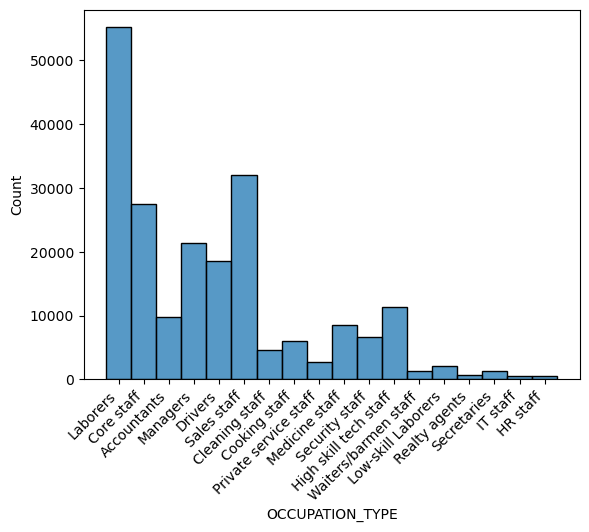

In [571]:
sns.histplot(mynew_application['OCCUPATION_TYPE'])
plt.xticks(rotation=45, ha='right')

This chart provides insights into the employment landscape within the dataset, highlighting the prevalence of various occupational roles.

In [257]:
mynew_application.isnull().sum()

TARGET                        0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
AMT_INCOME_TOTAL              0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               2
dtype: int64

In [265]:
mynew_application['CNT_FAM_MEMBERS'].median()

2.0

In [263]:
mynew_application['CNT_FAM_MEMBERS']=mynew_application['CNT_FAM_MEMBERS'].fillna(mynew_application['CNT_FAM_MEMBERS'].median())


C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\1467334048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_application['CNT_FAM_MEMBERS']=mynew_application['CNT_FAM_MEMBERS'].fillna(mynew_application['CNT_FAM_MEMBERS'].median())


In [267]:
mynew_application.isnull().sum()

TARGET                        0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
AMT_INCOME_TOTAL              0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
dtype: int64

The heatmap visualizes the correlation matrix between various financial and demographic variables, highlighting the strength and direction of relationships among them.

In [574]:
correlation_matrix = mynew_application.corr(numeric_only=True)

<Axes: >

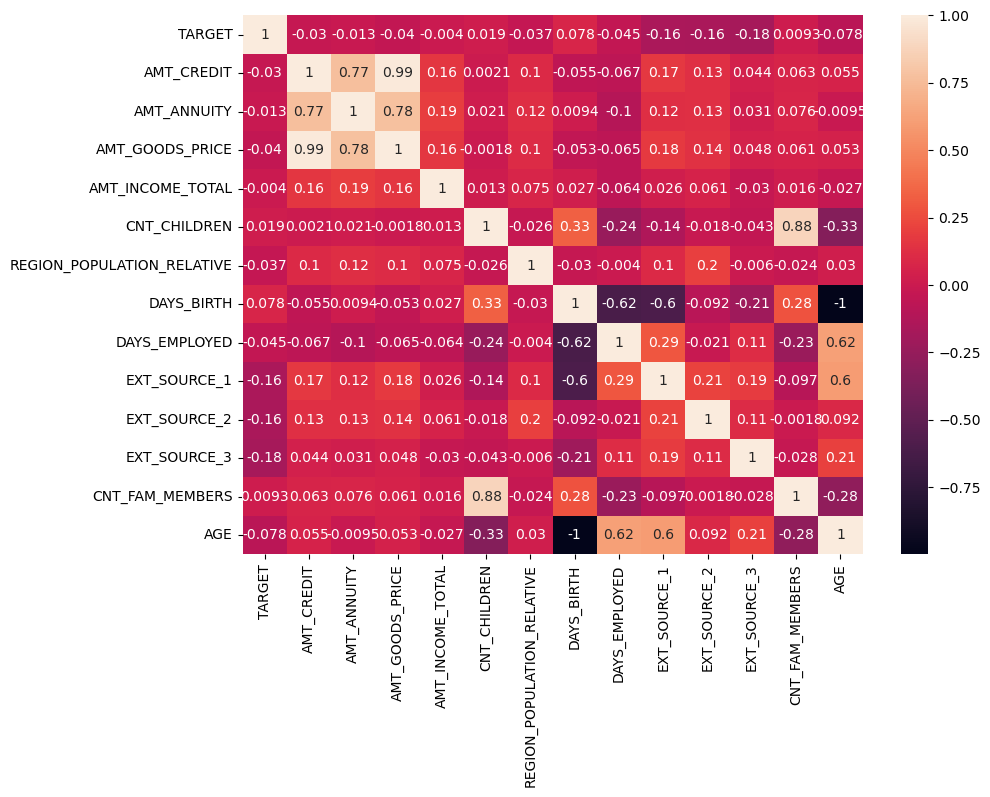

In [578]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)

Overall, this analysis reveals significant correlations, particularly between credit amount and other financial metrics, which could inform strategic decisions in financial modeling and customer analysis.

# UNIVARIATE

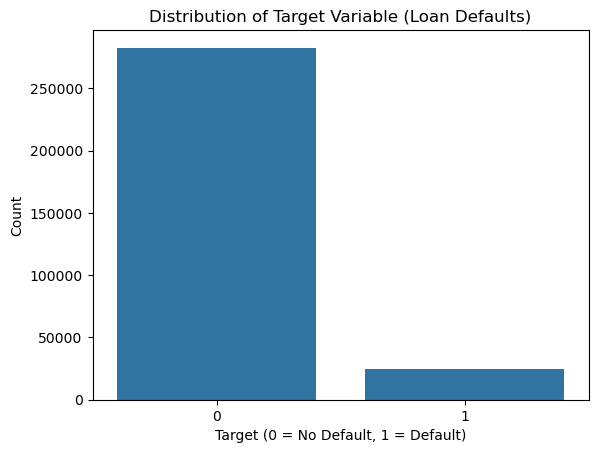

In [584]:
# Distribution of the target variable (clients with payment difficulties)
sns.countplot(x='TARGET', data=mynew_application)
plt.title('Distribution of Target Variable (Loan Defaults)')
plt.xlabel('Target (0 = No Default, 1 = Default)')
plt.ylabel('Count')
plt.show()

The chart illustrates a clear imbalance in the dataset, with a strong majority of cases classified as non-defaults (0) compared to defaults (1). This is crucial for understanding the distribution of loan outcomes, which can impact model training and evaluation in predictive analysis.

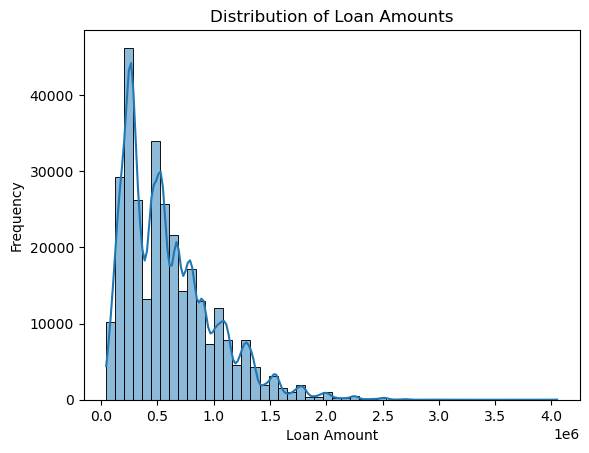

In [561]:
#Distribution of loan amounts
sns.histplot(mynew_application['AMT_CREDIT'], kde=True, bins=50)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

This visualization provides key insights into lending patterns, indicating that lower loan amounts are more prevalent among borrowers, which can inform lending strategies and risk assessment.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\283941554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_application['AGE'] = -mynew_application['DAYS_BIRTH'] / 365
C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\283941554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_application['AGE']=mynew_application['AGE'].astype(int,errors='ignore')


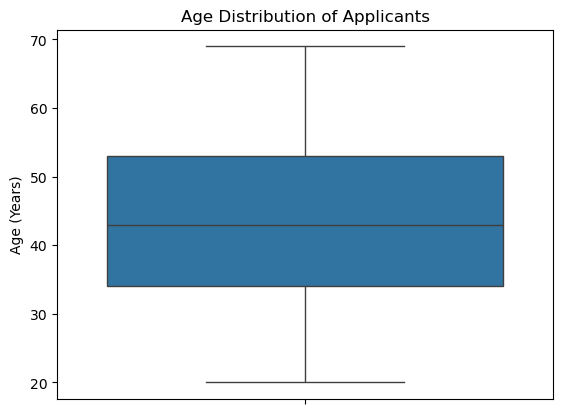

In [557]:
# Boxplot of age (DAYS_BIRTH converted to years)
mynew_application['AGE'] = -mynew_application['DAYS_BIRTH'] / 365
mynew_application['AGE']=mynew_application['AGE'].astype(int,errors='ignore')
sns.boxplot(y='AGE', data=mynew_application)
plt.title('Age Distribution of Applicants')
plt.ylabel('Age (Years)')
plt.show()




This box plot effectively summarizes the age distribution, revealing that most loan applicants tend to be in their mid-40s, which can be important information for understanding the demographic profile of borrowers.

### conclusion:
As i have filled the null values of AMT_ANNUITY by filling the null values using medain because:
1. If we use mean to fill the value it will also consider the extreme high value and extreme low value because of which it will also take outliers
2. If we use mode to fill the values it will calculate the highest value frequency and fill with that value so the data will become imbalnace
3. So i have used median which is eliminate the outliers and only calculate the 25th percentile to 75th percentile

C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\2192137455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_application['LOAN_INCOME_RATIO'] = mynew_application['AMT_CREDIT'] / mynew_application['AMT_INCOME_TOTAL']


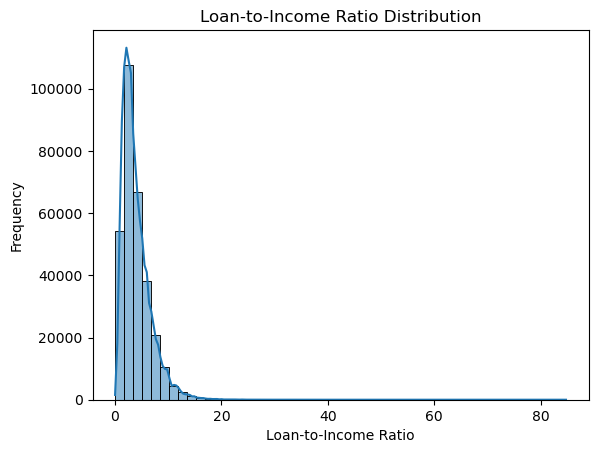

In [582]:
# Loan-to-income ratio
mynew_application['LOAN_INCOME_RATIO'] = mynew_application['AMT_CREDIT'] / mynew_application['AMT_INCOME_TOTAL']
sns.histplot(mynew_application['LOAN_INCOME_RATIO'], kde=True, bins=50)
plt.title('Loan-to-Income Ratio Distribution')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

This histogram effectively summarizes the loan-to-income ratio, demonstrating that the majority of borrowers tend to maintain low ratios, which can be crucial information for assessing borrower risk and lending policies.

In [312]:
mynew_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   AMT_CREDIT                  307511 non-null  float64
 2   AMT_ANNUITY                 307511 non-null  float64
 3   AMT_GOODS_PRICE             307511 non-null  float64
 4   AMT_INCOME_TOTAL            307511 non-null  float64
 5   NAME_CONTRACT_TYPE          307511 non-null  object 
 6   CODE_GENDER                 307511 non-null  object 
 7   FLAG_OWN_CAR                307511 non-null  object 
 8   FLAG_OWN_REALTY             307511 non-null  object 
 9   CNT_CHILDREN                307511 non-null  int64  
 10  NAME_INCOME_TYPE            307511 non-null  object 
 11  NAME_EDUCATION_TYPE         307511 non-null  object 
 12  NAME_FAMILY_STATUS          307511 non-null  object 
 13  NAME_HOUSING_T

### Univariate Analysis
- Target Variable Distribution
Visualize the proportion of defaulters (TARGET=1) vs non-defaulters (TARGET=0).
Insight: Identifies data imbalance, emphasizing the need to focus on defaulters.
- Loan Amount Distribution
Analyze the range and typical sizes of loans (AMT_CREDIT).
Insight: Larger loans may carry higher default risk.
- Income Distribution
Visualize income levels (AMT_INCOME_TOTAL) to understand borrower financial capacity.
Insight: Low-income borrowers might be more likely to default.
- Age Distribution
Derive applicant age from the DAYS_BIRTH column and analyze its distribution.
Insight: Younger borrowers may have higher default rates due to financial instability.
- Loan-to-Income Ratio
Calculate the ratio of loan amount to income (AMT_CREDIT / AMT_INCOME_TOTAL).
Insight: Higher ratios indicate applicants are over-leveraged and at higher risk of default.

# bivariate


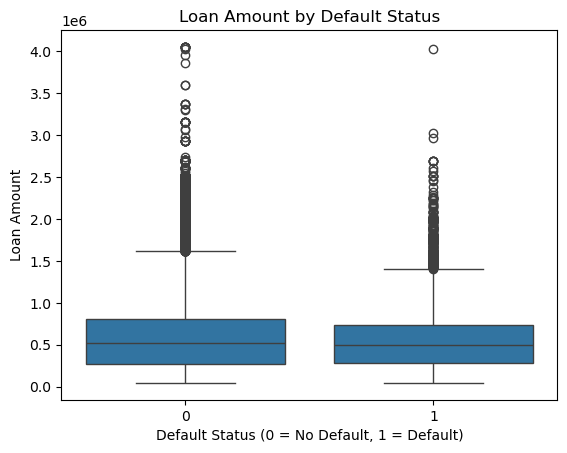

In [339]:
# Target variable vs Loan Amount
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=mynew_application)
plt.title('Loan Amount by Default Status')
plt.xlabel('Default Status (0 = No Default, 1 = Default)')
plt.ylabel('Loan Amount')
plt.show()


This box plot effectively summarizes the relationship between loan amounts and default status, providing insights that can be useful for risk assessment and lending strategies.

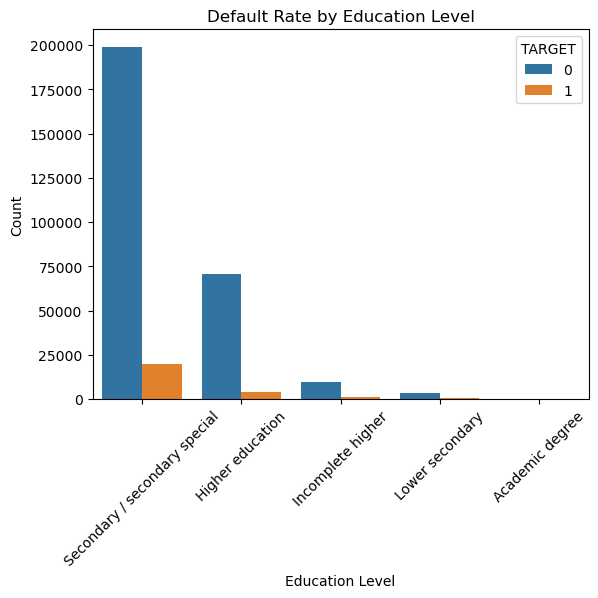

In [587]:
#Default rate by Education Level
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=mynew_application)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This analysis could help understand how education level relates to default rates, potentially informing decisions related to lending or financial services.



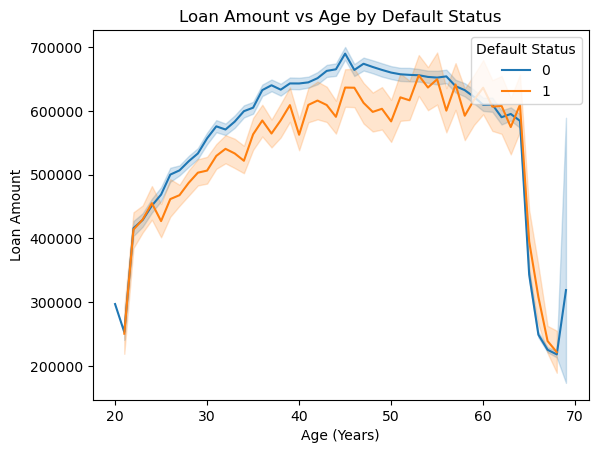

In [593]:
# Relationship between Age and Loan Amount
sns.lineplot(x='AGE', y='AMT_CREDIT', hue='TARGET', data=mynew_application)
plt.title('Loan Amount vs Age by Default Status')
plt.xlabel('Age (Years)')
plt.ylabel('Loan Amount')
plt.legend(title='Default Status', loc='upper right')
plt.show()

The chart indicates a correlation between age, loan amount, and default risk, with younger borrowers taking smaller loans and showing higher default rates, while older non-defaulters tend to secure larger loans.

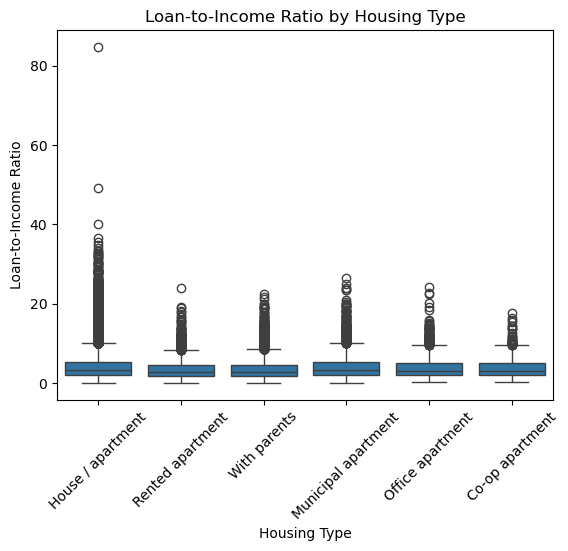

In [351]:
# Housing type vs Loan-to-Income Ratio
sns.boxplot(x='NAME_HOUSING_TYPE', y='LOAN_INCOME_RATIO', data=mynew_application)
plt.title('Loan-to-Income Ratio by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Loan-to-Income Ratio')
plt.xticks(rotation=45)
plt.show()

The data indicates that individuals residing in houses or apartments often have higher loan-to-income ratios, suggesting greater financial strain, while those in other housing types tend to maintain lower ratios, reflecting reduced financial risk.

#### Bivariate Analysis

Bivariate analysis investigates relationships between two variables to identify trends influencing loan defaults.

- Loan Amount vs Target:
Loan amounts are compared for defaulters and non-defaulters.
   - Insight: Identifies whether larger loans are more likely to default, indicating loan size as a potential risk driver.
     
- Income vs Target:
Analyzing applicant income for defaulters vs non-defaulters helps assess income as a default predictor.
   - Insight: Default rates may be higher for lower-income groups, suggesting income thresholds for loan approval.
     
- Education Level vs Default Rate:
Examines the relationship between education and default.
   - Insight: Lower education levels might correlate with higher default rates due to lack of financial literacy or unstable jobs.
     
- Housing Type vs Loan-to-Income Ratio:
Loan-to-income ratios across housing types reveal financial behavior.
   - Insight: Renters may have higher ratios, indicating higher financial stress compared to homeowners.
     
- Age vs Loan Amount:
Correlates borrower age with loan amount across default categories.
   - Insight: Younger borrowers might take smaller loans but could default more often, showing age-based risk trends.based risk trends.

# multivariate

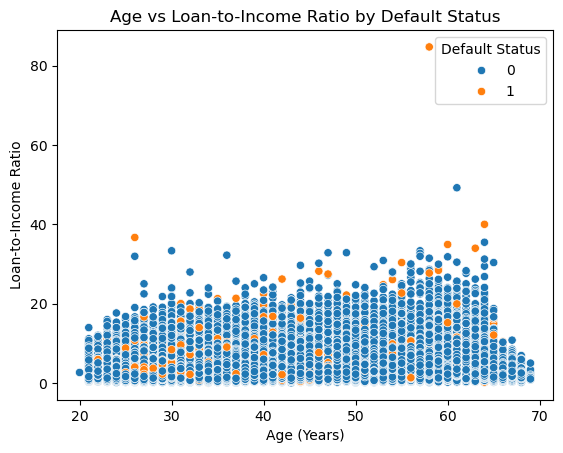

In [355]:
# Age vs Loan-to-Income Ratio by Default Status
sns.scatterplot(x='AGE', y='LOAN_INCOME_RATIO', hue='TARGET', data=mynew_application)
plt.title('Age vs Loan-to-Income Ratio by Default Status')
plt.xlabel('Age (Years)')
plt.ylabel('Loan-to-Income Ratio')
plt.legend(title='Default Status', loc='upper right')
plt.show()

The scatter plot indicates that younger individuals often have higher loan-to-income ratios and higher default rates, while older individuals tend to maintain lower ratios and a reduced likelihood of default.

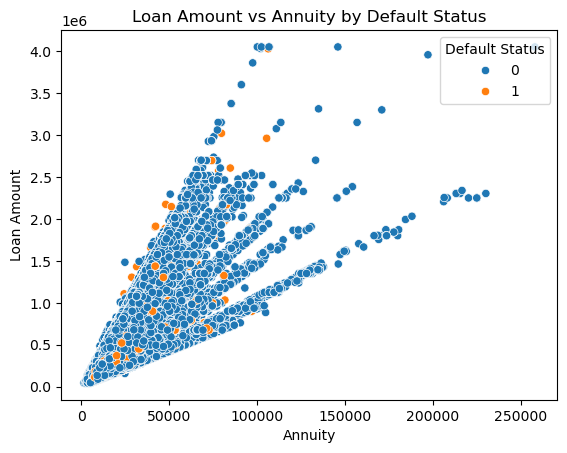

In [367]:
# Loan Amount vs Annuity by Default Status
sns.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', hue='TARGET', data=mynew_application)
plt.title('Loan Amount vs Annuity by Default Status')
plt.xlabel('Annuity')
plt.ylabel('Loan Amount')
plt.legend(title='Default Status', loc='upper right')
plt.show()


The plot reveals that borrowers with larger loans and higher annuity payments have a higher likelihood of default, while those with smaller loans and lower payments are more likely to stay in good standing.

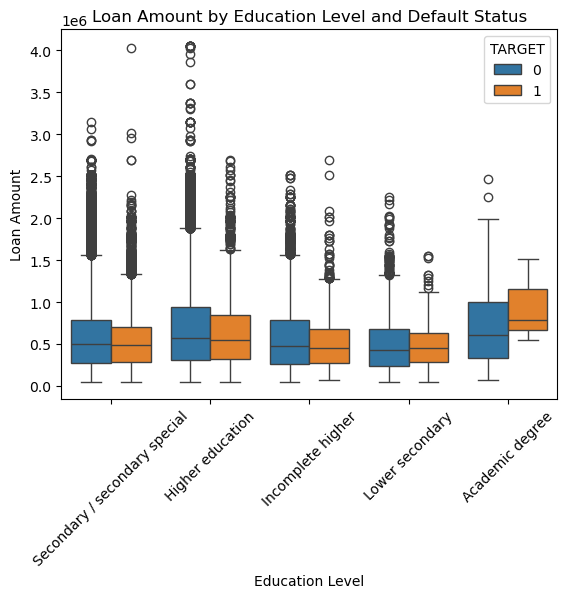

In [369]:
# Education Level vs Loan Amount vs Default Status
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='TARGET', data=mynew_application)
plt.title('Loan Amount by Education Level and Default Status')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

The visualization shows that education level significantly influences loan amounts, with higher education associated with larger loans and lower default rates, while lower education correlates with smaller loans and higher default rates.

#### Multivariate Analysis

Multivariate analysis explores relationships among multiple variables to identify patterns and driving factors behind defaults.

- Age vs Loan-to-Income Ratio by Default Status:
Analyzes how age and loan-to-income ratios interact for defaulters vs non-defaulters.
Insight: Younger applicants with high loan-to-income ratios are more likely to default, emphasizing the need for stricter screening.
- EXT_SOURCE_1 vs EXT_SOURCE_2 by Target:
External risk scores are plotted against each other across default categories.
Insight: Strong correlations between risk scores and default behavior highlight their predictive importance.
- Loan Amount vs Annuity by Target:
Compares loan amounts and annuities for defaulters and non-defaulters.
Insight: Larger loans with higher annuities are riskier, indicating repayment strain.
- Education Level vs Loan Amount vs Default Status:
Studies the interaction between education, loan amount, and defaults.
Insight: Higher loan amounts among less educated groups increase default risk, reinforcing the role of education in financial stability.
- Loan Purpose vs Payment Terms by Contract Status:
Examines loan purpose, repayment terms, and contract outcomes.
Insight: Shorter terms for high-risk purposes (e.g., personal loans) might lead to cancellations or refusals, aiding in portfolio adjustments.

# Splitting the target varibale into '1' and '0', 
### 1--> for defaulters and 0--> for non defaulters 

# UNIVARIATE after splitting

In [314]:
df_targ_1=mynew_application[mynew_application['TARGET']==1]

In [316]:
df_targ_0=mynew_application[mynew_application['TARGET']==0]

C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\2657131163.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\2657131163.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


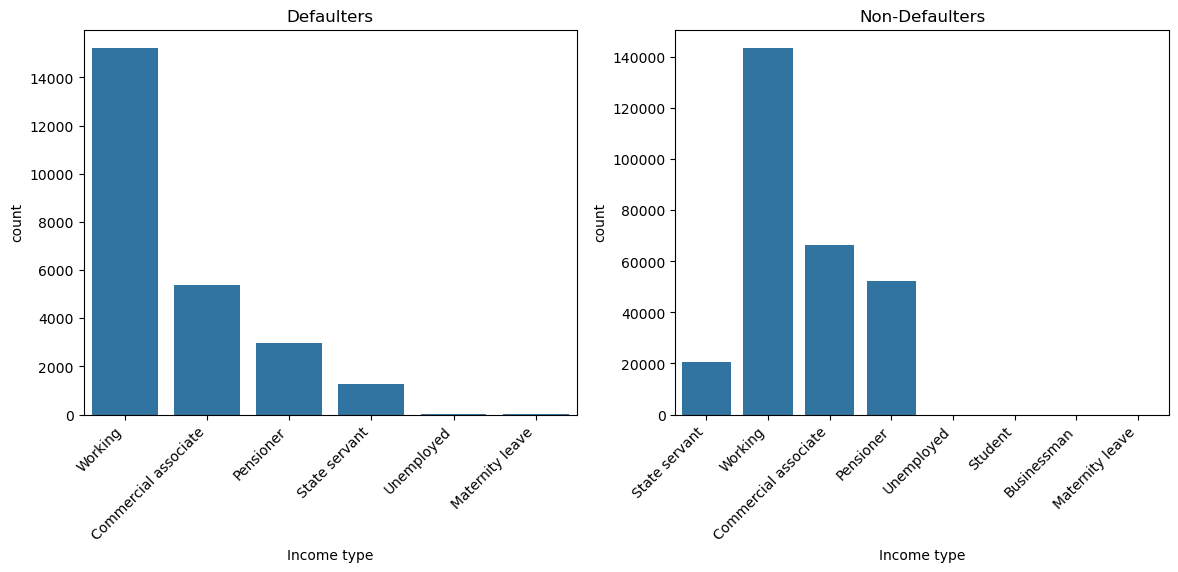

In [318]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_targ_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_targ_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

The charts suggest that borrowers in stable employment, particularly those classified as Working or State Servants, are less likely to default, while the Working category shows higher default rates due to its larger population, indicating that not all employment types offer the same level of financial security.

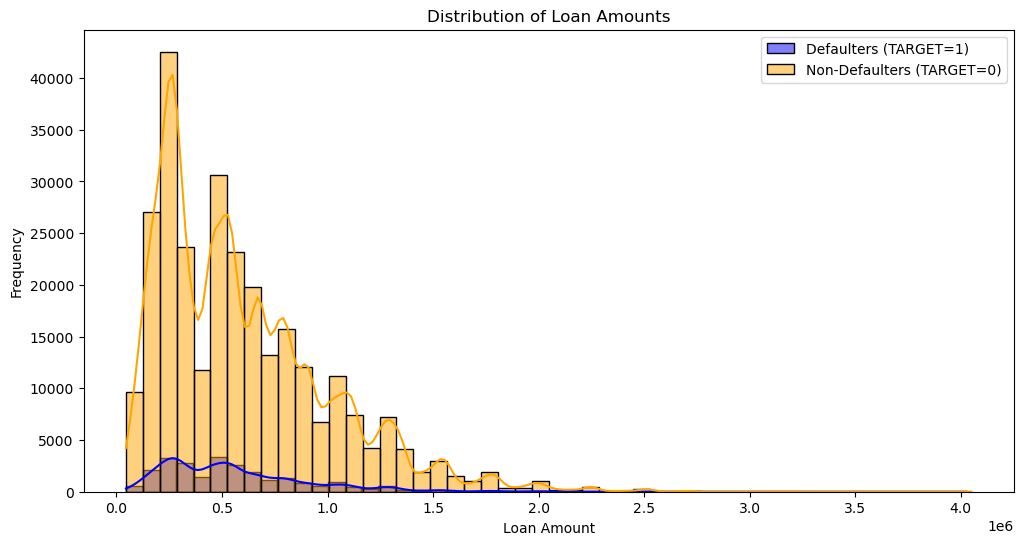

In [328]:
# Distribution of Loan Amounts for Defaulters and Non-Defaulters
plt.figure(figsize=(12, 6))
sns.histplot(df_targ_1['AMT_CREDIT'], kde=True, bins=50, color='blue', label='Defaulters (TARGET=1)')
sns.histplot(df_targ_0['AMT_CREDIT'], kde=True, bins=50, color='orange', label='Non-Defaulters (TARGET=0)')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The histogram highlights a clear relationship between loan amounts and default risk, showing that larger loans are often linked to non-defaulting behavior, while smaller loans may indicate higher financial vulnerability.

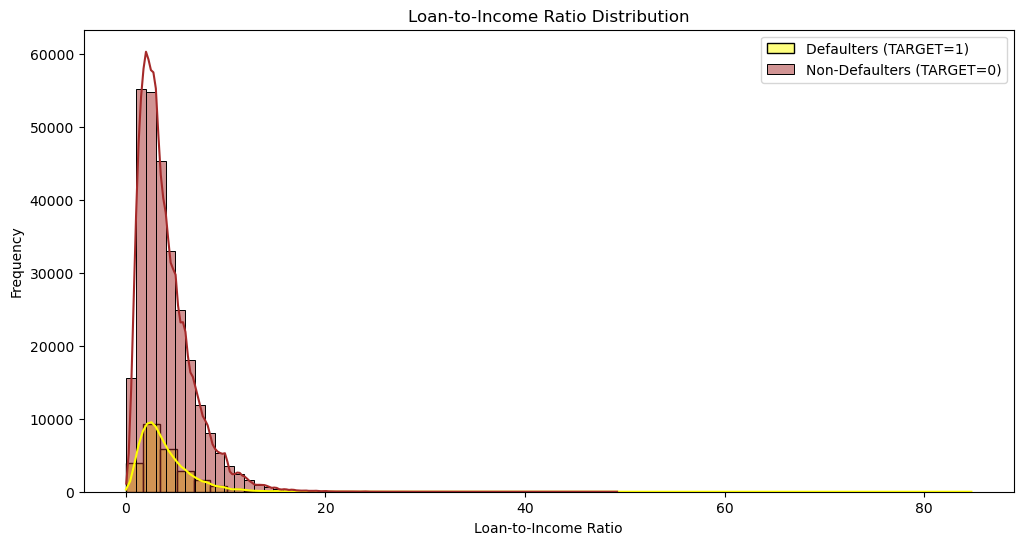

In [332]:
# 4. Loan-to-Income Ratio Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_targ_1['LOAN_INCOME_RATIO'], kde=True, bins=50, color='yellow', label='Defaulters (TARGET=1)')
sns.histplot(df_targ_0['LOAN_INCOME_RATIO'], kde=True, bins=50, color='brown', label='Non-Defaulters (TARGET=0)')
plt.title('Loan-to-Income Ratio Distribution')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram effectively illustrates the relationship between loan-to-income ratio and default risk, showing that lower ratios are linked to non-defaulting behavior, while higher ratios indicate greater financial strain and increased default risks, offering valuable insights for lenders on borrower stability.

# Bivariate after spitting

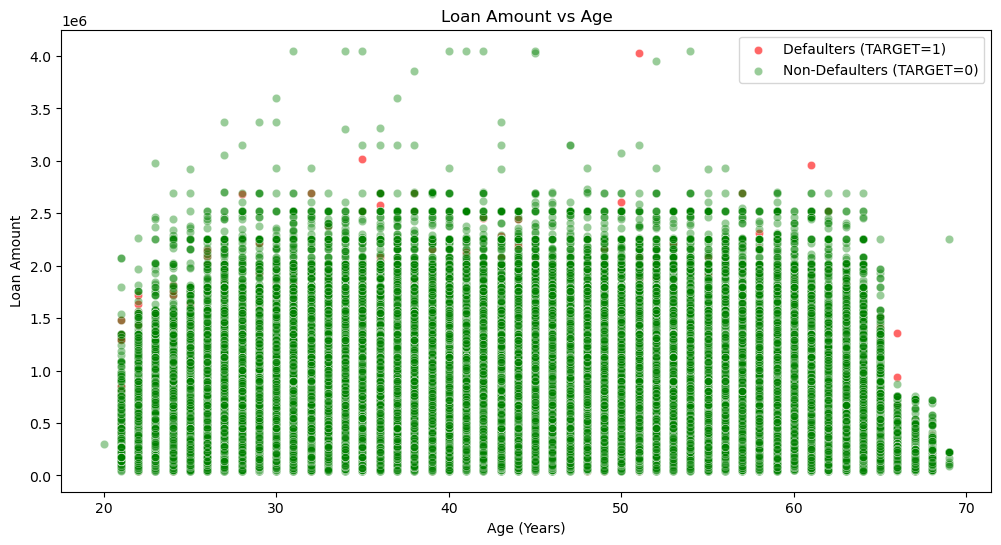

In [610]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AGE', y='AMT_CREDIT', data=df_targ_1, color='red', label='Defaulters (TARGET=1)', alpha=0.6)
sns.scatterplot(x='AGE', y='AMT_CREDIT', data=df_targ_0, color='green', label='Non-Defaulters (TARGET=0)', alpha=0.4)
plt.title('Loan Amount vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

This scatter plot effectively shows the relationship between age, loan amounts, and default status, highlighting that younger borrowers tend to default more frequently with lower loan amounts, while older borrowers are less likely to default and are associated with a broader range of loan amounts. These insights can aid lenders in assessing risk profiles based on age and loan characteristics.

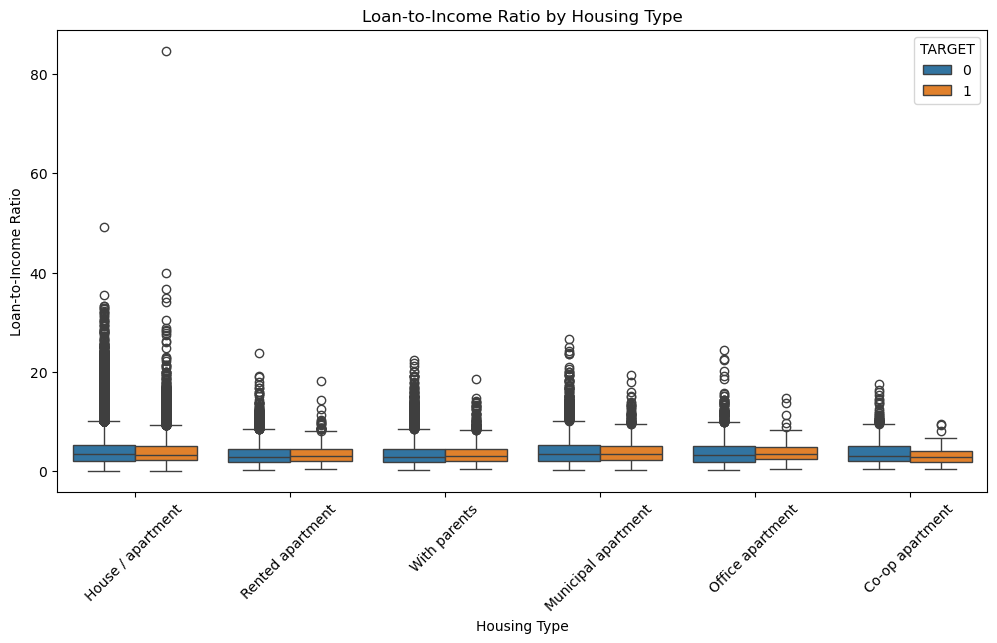

In [614]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_HOUSING_TYPE', y='LOAN_INCOME_RATIO', hue='TARGET', data=mynew_application)
plt.title('Loan-to-Income Ratio by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Loan-to-Income Ratio')
plt.xticks(rotation=45)
plt.show()

This box plot effectively illustrates the relationship between housing type, loan-to-income ratios, and default risk. It suggests that individuals in houses or apartments tend to have better financial stability and manage loans more effectively, while higher loan-to-income ratios among defaulting borrowers indicate greater financial risk, providing valuable insights for lenders when assessing borrowing capacity based on housing type.

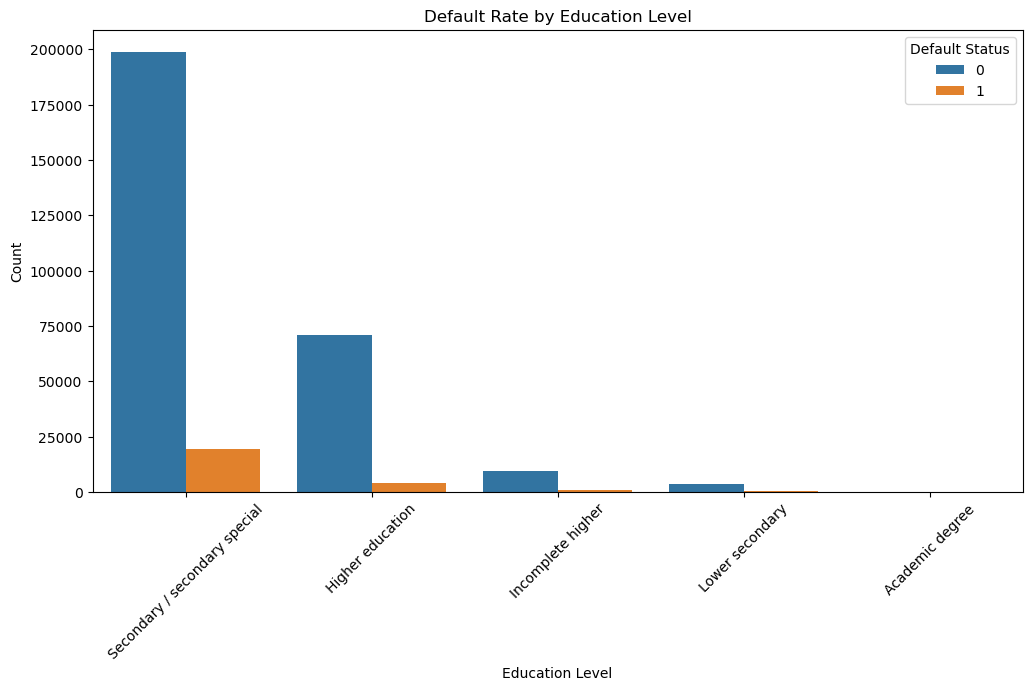

In [617]:
plt.figure(figsize=(12, 6))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=mynew_application)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default Status')
plt.show()

This bar chart shows that borrowers with higher education are less likely to default, highlighting education as a key factor in financial behavior. The variation in borrower counts across education levels provides insights into the link between education and default risk.

# cleaning data of the previous_application 

In [377]:
mynew_previous_application.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_DOWN_PAYMENT          895844
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_CASH_LOAN_PURPOSE         0
CNT_PAYMENT               372230
RATE_DOWN_PAYMENT         895844
dtype: int64

In [396]:
round((100*mynew_previous_application.isnull().sum()/len(mynew_previous_application)),2)

SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_DOWN_PAYMENT          53.64
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_CASH_LOAN_PURPOSE     0.00
CNT_PAYMENT               22.29
RATE_DOWN_PAYMENT         53.64
dtype: float64

## filling up the null values 

In [420]:
mynew_previous_application['AMT_DOWN_PAYMENT'].median()

1638.0

In [416]:
mynew_previous_application['AMT_DOWN_PAYMENT']=mynew_previous_application['AMT_DOWN_PAYMENT'].fillna(mynew_previous_application['AMT_DOWN_PAYMENT'].median())


C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\1321962989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_previous_application['AMT_DOWN_PAYMENT']=mynew_previous_application['AMT_DOWN_PAYMENT'].fillna(mynew_previous_application['AMT_DOWN_PAYMENT'].median())


In [422]:
mynew_previous_application['RATE_DOWN_PAYMENT'].median()

0.051605084707529295

In [424]:
mynew_previous_application['RATE_DOWN_PAYMENT']=mynew_previous_application['RATE_DOWN_PAYMENT'].fillna(mynew_previous_application['RATE_DOWN_PAYMENT'].median())


C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\867032477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_previous_application['RATE_DOWN_PAYMENT']=mynew_previous_application['RATE_DOWN_PAYMENT'].fillna(mynew_previous_application['RATE_DOWN_PAYMENT'].median())


In [426]:
mynew_previous_application.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_DOWN_PAYMENT               0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_CASH_LOAN_PURPOSE         0
CNT_PAYMENT               372230
RATE_DOWN_PAYMENT              0
dtype: int64

In [438]:
mynew_previous_application['CNT_PAYMENT'].median()

12.0

In [434]:
mynew_previous_application['CNT_PAYMENT']=mynew_previous_application['CNT_PAYMENT'].fillna(mynew_previous_application['CNT_PAYMENT'].median())

C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\233192546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_previous_application['CNT_PAYMENT']=mynew_previous_application['CNT_PAYMENT'].fillna(mynew_previous_application['CNT_PAYMENT'].median())


In [443]:
mynew_previous_application['AMT_CREDIT'].median()

80541.0

In [445]:
mynew_previous_application['AMT_CREDIT']=mynew_previous_application['AMT_CREDIT'].fillna(mynew_previous_application['AMT_CREDIT'].median())

C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\890420921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mynew_previous_application['AMT_CREDIT']=mynew_previous_application['AMT_CREDIT'].fillna(mynew_previous_application['AMT_CREDIT'].median())


In [447]:
mynew_previous_application.isnull().sum()

SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_APPLICATION           0
AMT_CREDIT                0
AMT_DOWN_PAYMENT          0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_CASH_LOAN_PURPOSE    0
CNT_PAYMENT               0
RATE_DOWN_PAYMENT         0
dtype: int64

# Univariate for previous_application

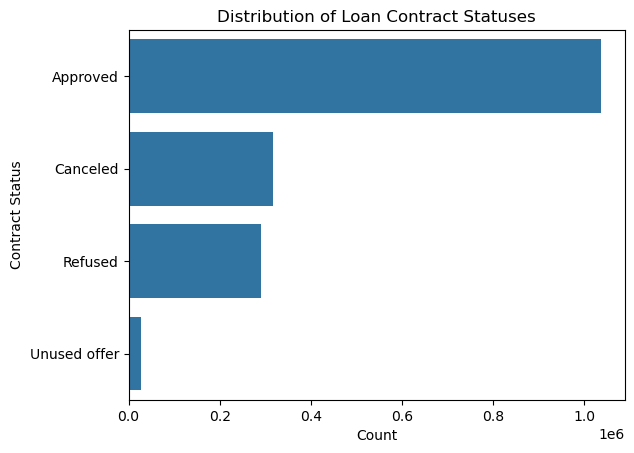

In [465]:
#Distribution of contract statuses
sns.countplot(y='NAME_CONTRACT_STATUS', data=mynew_previous_application, order=mynew_previous_application['NAME_CONTRACT_STATUS'].value_counts().index)
plt.title('Distribution of Loan Contract Statuses')
plt.xlabel('Count')
plt.ylabel('Contract Status')
plt.show()

This distribution highlights the effectiveness of the loan approval process, showing that most contracts are approved, while cancellations and refusals, though notable, make up a smaller portion. Understanding these trends can help lenders improve approval rates and reduce cancellations, leading to better loan outcomes.

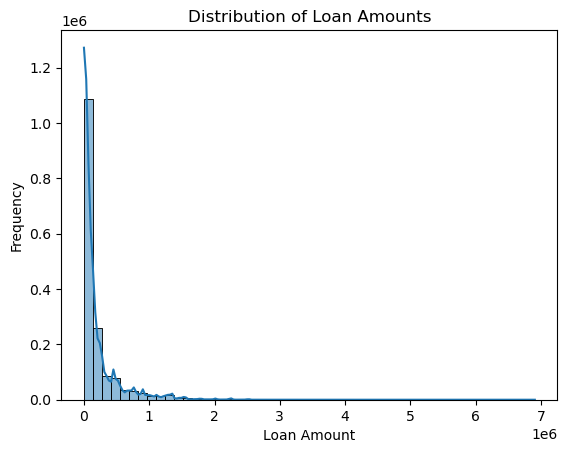

In [464]:
#Distribution of loan amounts
sns.histplot(mynew_previous_application['AMT_CREDIT'], kde=True, bins=50)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

This histogram highlights the dominance of smaller loan amounts, showing that while large loans exist, they are not the norm. It emphasizes borrowers' preference for manageable debt, helping lenders tailor products to smaller loan borrowers while considering the smaller segment of high-value borrowers.

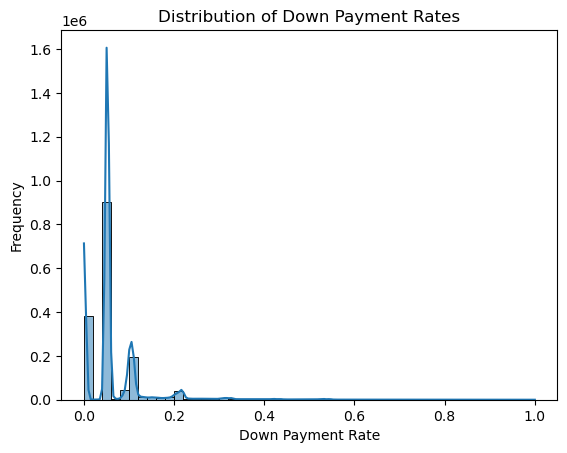

In [462]:
# Distribution of down payment rates
sns.histplot(mynew_previous_application['RATE_DOWN_PAYMENT'], kde=True, bins=50)
plt.title('Distribution of Down Payment Rates')
plt.xlabel('Down Payment Rate')
plt.ylabel('Frequency')
plt.show()



This histogram highlights the trend of low down payment rates in loan applications, suggesting that many borrowers prefer to maintain liquidity or lack available funds upfront. Lenders can use this information to design products catering to borrowers seeking low or no down payment options.

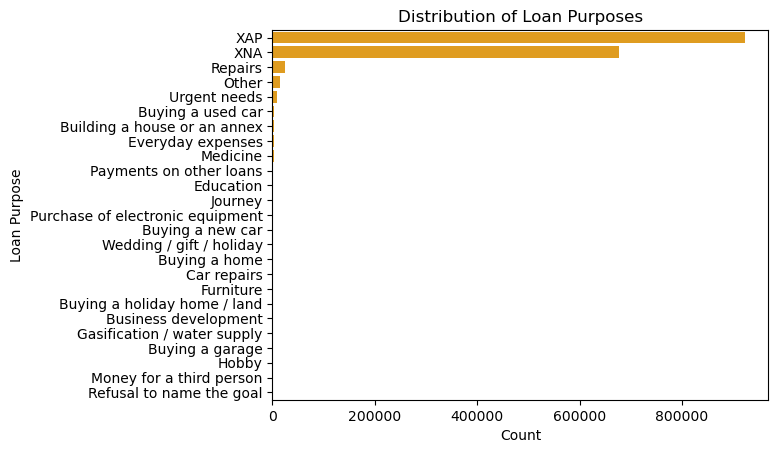

In [626]:
#Count of loan purposes
sns.countplot(y='NAME_CASH_LOAN_PURPOSE',color='orange',data=mynew_previous_application, order=mynew_previous_application['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.title('Distribution of Loan Purposes')
plt.ylabel('Loan Purpose')
plt.xlabel('Count')
plt.show()

This chart highlights the main reasons borrowers seek loans, with categories like XAP and XNA making up the majority. It suggests that many borrowers use loans for general or urgent needs, while specific purposes like education and vehicle purchases are less common. Lenders can use this information to tailor offerings to meet the most frequent borrower needs.

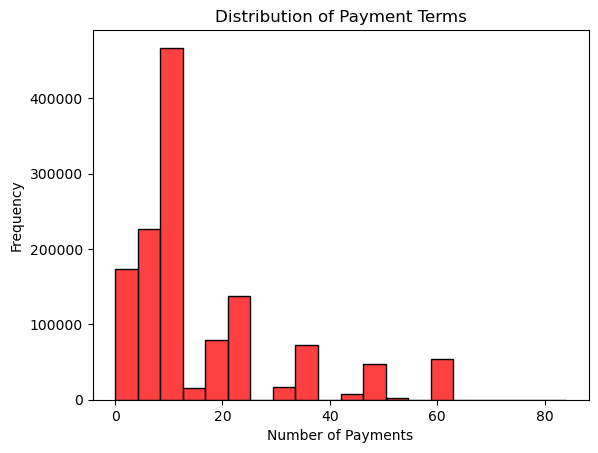

In [624]:
#Distribution of payment terms
sns.histplot(mynew_previous_application['CNT_PAYMENT'], kde=False, bins=20,color='red')
plt.title('Distribution of Payment Terms')
plt.xlabel('Number of Payments')
plt.ylabel('Frequency')
plt.show()

This histogram highlights the prevalence of short payment terms, with many contracts reflecting minimal or no payments. It suggests a preference for short-term borrowing, possibly for quicker repayment or lower long-term debt. Lenders can use this information to adjust their offerings and create products that cater to short-term loan needs.

# bivariate for previous_application

C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


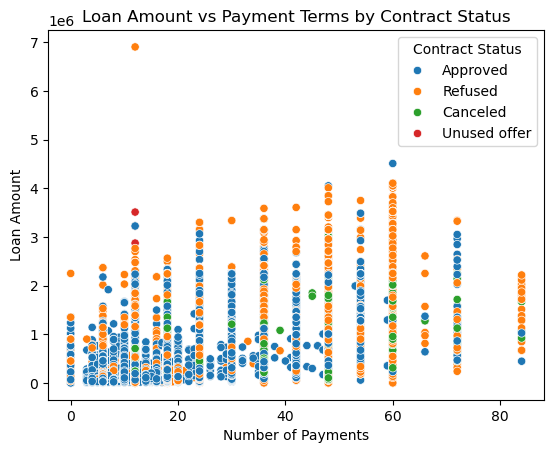

In [473]:
# Loan amount vs Payment terms
sns.scatterplot(x='CNT_PAYMENT', y='AMT_CREDIT', data=mynew_previous_application, hue='NAME_CONTRACT_STATUS')
plt.title('Loan Amount vs Payment Terms by Contract Status')
plt.xlabel('Number of Payments')
plt.ylabel('Loan Amount')
plt.legend(title='Contract Status')
plt.show()

This scatter plot illustrates the relationship between loan amounts, payment terms, and statuses, showing that approved loans dominate the market while refused and canceled loans are less common. It suggests a correlation between longer payment terms and larger loan amounts among approved loans, providing insights for lenders to refine their strategies and better meet borrower needs.







# Multivariate

In [635]:
correlation_matrix_prv = mynew_previous_application.corr(numeric_only=True)

<Axes: >

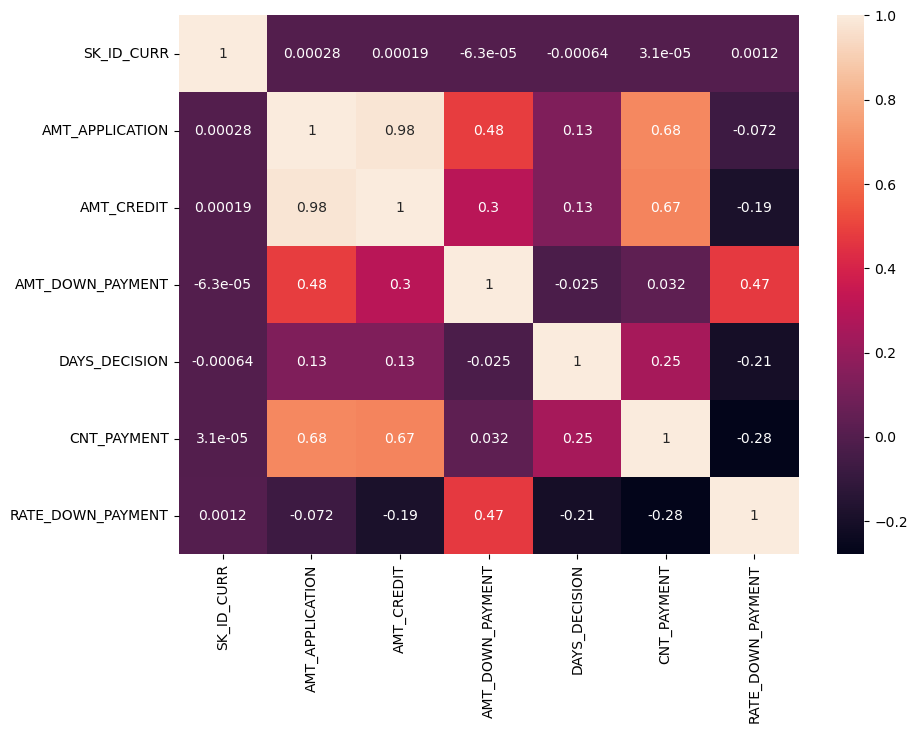

In [637]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix_prv, annot = True)

This heatmap reveals valuable insights into the relationships between financial metrics in the loan dataset, highlighting strong correlations, especially between application amounts and credit amounts. Understanding these correlations can help lenders and analysts assess loan characteristics and borrower behaviors, aiding in risk evaluation and decision-making.

## dropping the unnecessary rows which are not required under 'NAME_CASH_LOAN_PURPOSE' column which gives analysis with required values

In [481]:
mynew_previous_application = mynew_previous_application.drop(mynew_previous_application[mynew_previous_application.NAME_CASH_LOAN_PURPOSE == 'XAP'].index)
mynew_previous_application = mynew_previous_application.drop(mynew_previous_application[mynew_previous_application.NAME_CASH_LOAN_PURPOSE == 'XNA'].index)

# Merge applied for application_data.csv and previous_data.csv

In [500]:
mynew_application.head(5)

,TARGET,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,LOAN_INCOME_RATIO,SK_ID_CURR
0,1,406597.5,24700.5,351000.0,202500.0,Cash loans,M,N,Y,0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,0.083037,0.262949,0.139376,Laborers,1.0,25,2.007889,100002
1,0,1293502.5,35698.5,1129500.0,270000.0,Cash loans,F,N,N,0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,0.311267,0.622246,0.535276,Core staff,2.0,45,4.790750,100003
2,0,135000.0,6750.0,135000.0,67500.0,Revolving loans,M,Y,Y,0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,0.505998,0.555912,0.729567,Laborers,1.0,52,2.000000,100004
3,0,312682.5,29686.5,297000.0,135000.0,Cash loans,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,0.505998,0.650442,0.535276,Laborers,2.0,52,2.316167,100006
4,0,513000.0,21865.5,513000.0,121500.0,Cash loans,M,N,Y,0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,0.505998,0.322738,0.535276,Core staff,1.0,54,4.222222,100007


In [494]:
mynew_previous_application.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CASH_LOAN_PURPOSE,CNT_PAYMENT,RATE_DOWN_PAYMENT
4,202054,Cash loans,337500.0,404055.0,1638.0,Refused,-781,Repairs,24.0,0.051605
5,199383,Cash loans,315000.0,340573.5,1638.0,Approved,-684,Everyday expenses,18.0,0.051605
19,199178,Cash loans,45000.0,49455.0,1638.0,Refused,-584,Everyday expenses,18.0,0.051605
51,163660,Cash loans,67500.0,82611.0,1638.0,Approved,-766,Car repairs,12.0,0.051605
85,306707,Cash loans,225000.0,269550.0,1638.0,Refused,-13,Building a house or an annex,36.0,0.051605


In [502]:
merged_df = pd.merge(mynew_application,mynew_previous_application,on='SK_ID_CURR', how='inner')
merged_df.head()



,TARGET,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,LOAN_INCOME_RATIO,SK_ID_CURR,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CASH_LOAN_PURPOSE,CNT_PAYMENT,RATE_DOWN_PAYMENT
0,0,180000.0,9000.0,180000.0,90000.0,Revolving loans,M,N,Y,0,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,0.297914,0.502779,0.535276,Laborers,1.0,28,2.000000,100034,Cash loans,94500.0,109971.0,1638.0,Approved,-599,Other,6.0,0.051605
1,0,665892.0,24592.5,477000.0,292500.0,Cash loans,F,N,Y,0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,0.505998,0.479987,0.410103,High skill tech staff,2.0,41,2.276554,100035,Cash loans,1260000.0,1260000.0,1638.0,Refused,-119,Payments on other loans,60.0,0.051605
2,0,733315.5,39069.0,679500.0,360000.0,Cash loans,M,Y,N,1,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,0.505998,0.321745,0.411849,Drivers,3.0,32,2.036987,100039,Cash loans,1350000.0,1487214.0,1638.0,Approved,-695,Buying a used car,42.0,0.051605
3,0,540000.0,27000.0,540000.0,180000.0,Revolving loans,M,Y,Y,0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,0.505998,0.738053,0.605836,Managers,2.0,44,3.000000,100046,Cash loans,337500.0,407911.5,1638.0,Approved,-539,Repairs,18.0,0.051605
4,0,540000.0,27000.0,540000.0,180000.0,Revolving loans,M,Y,Y,0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,0.505998,0.738053,0.605836,Managers,2.0,44,3.000000,100046,Cash loans,450000.0,555723.0,1638.0,Refused,-449,Repairs,24.0,0.051605


# graphs for merge

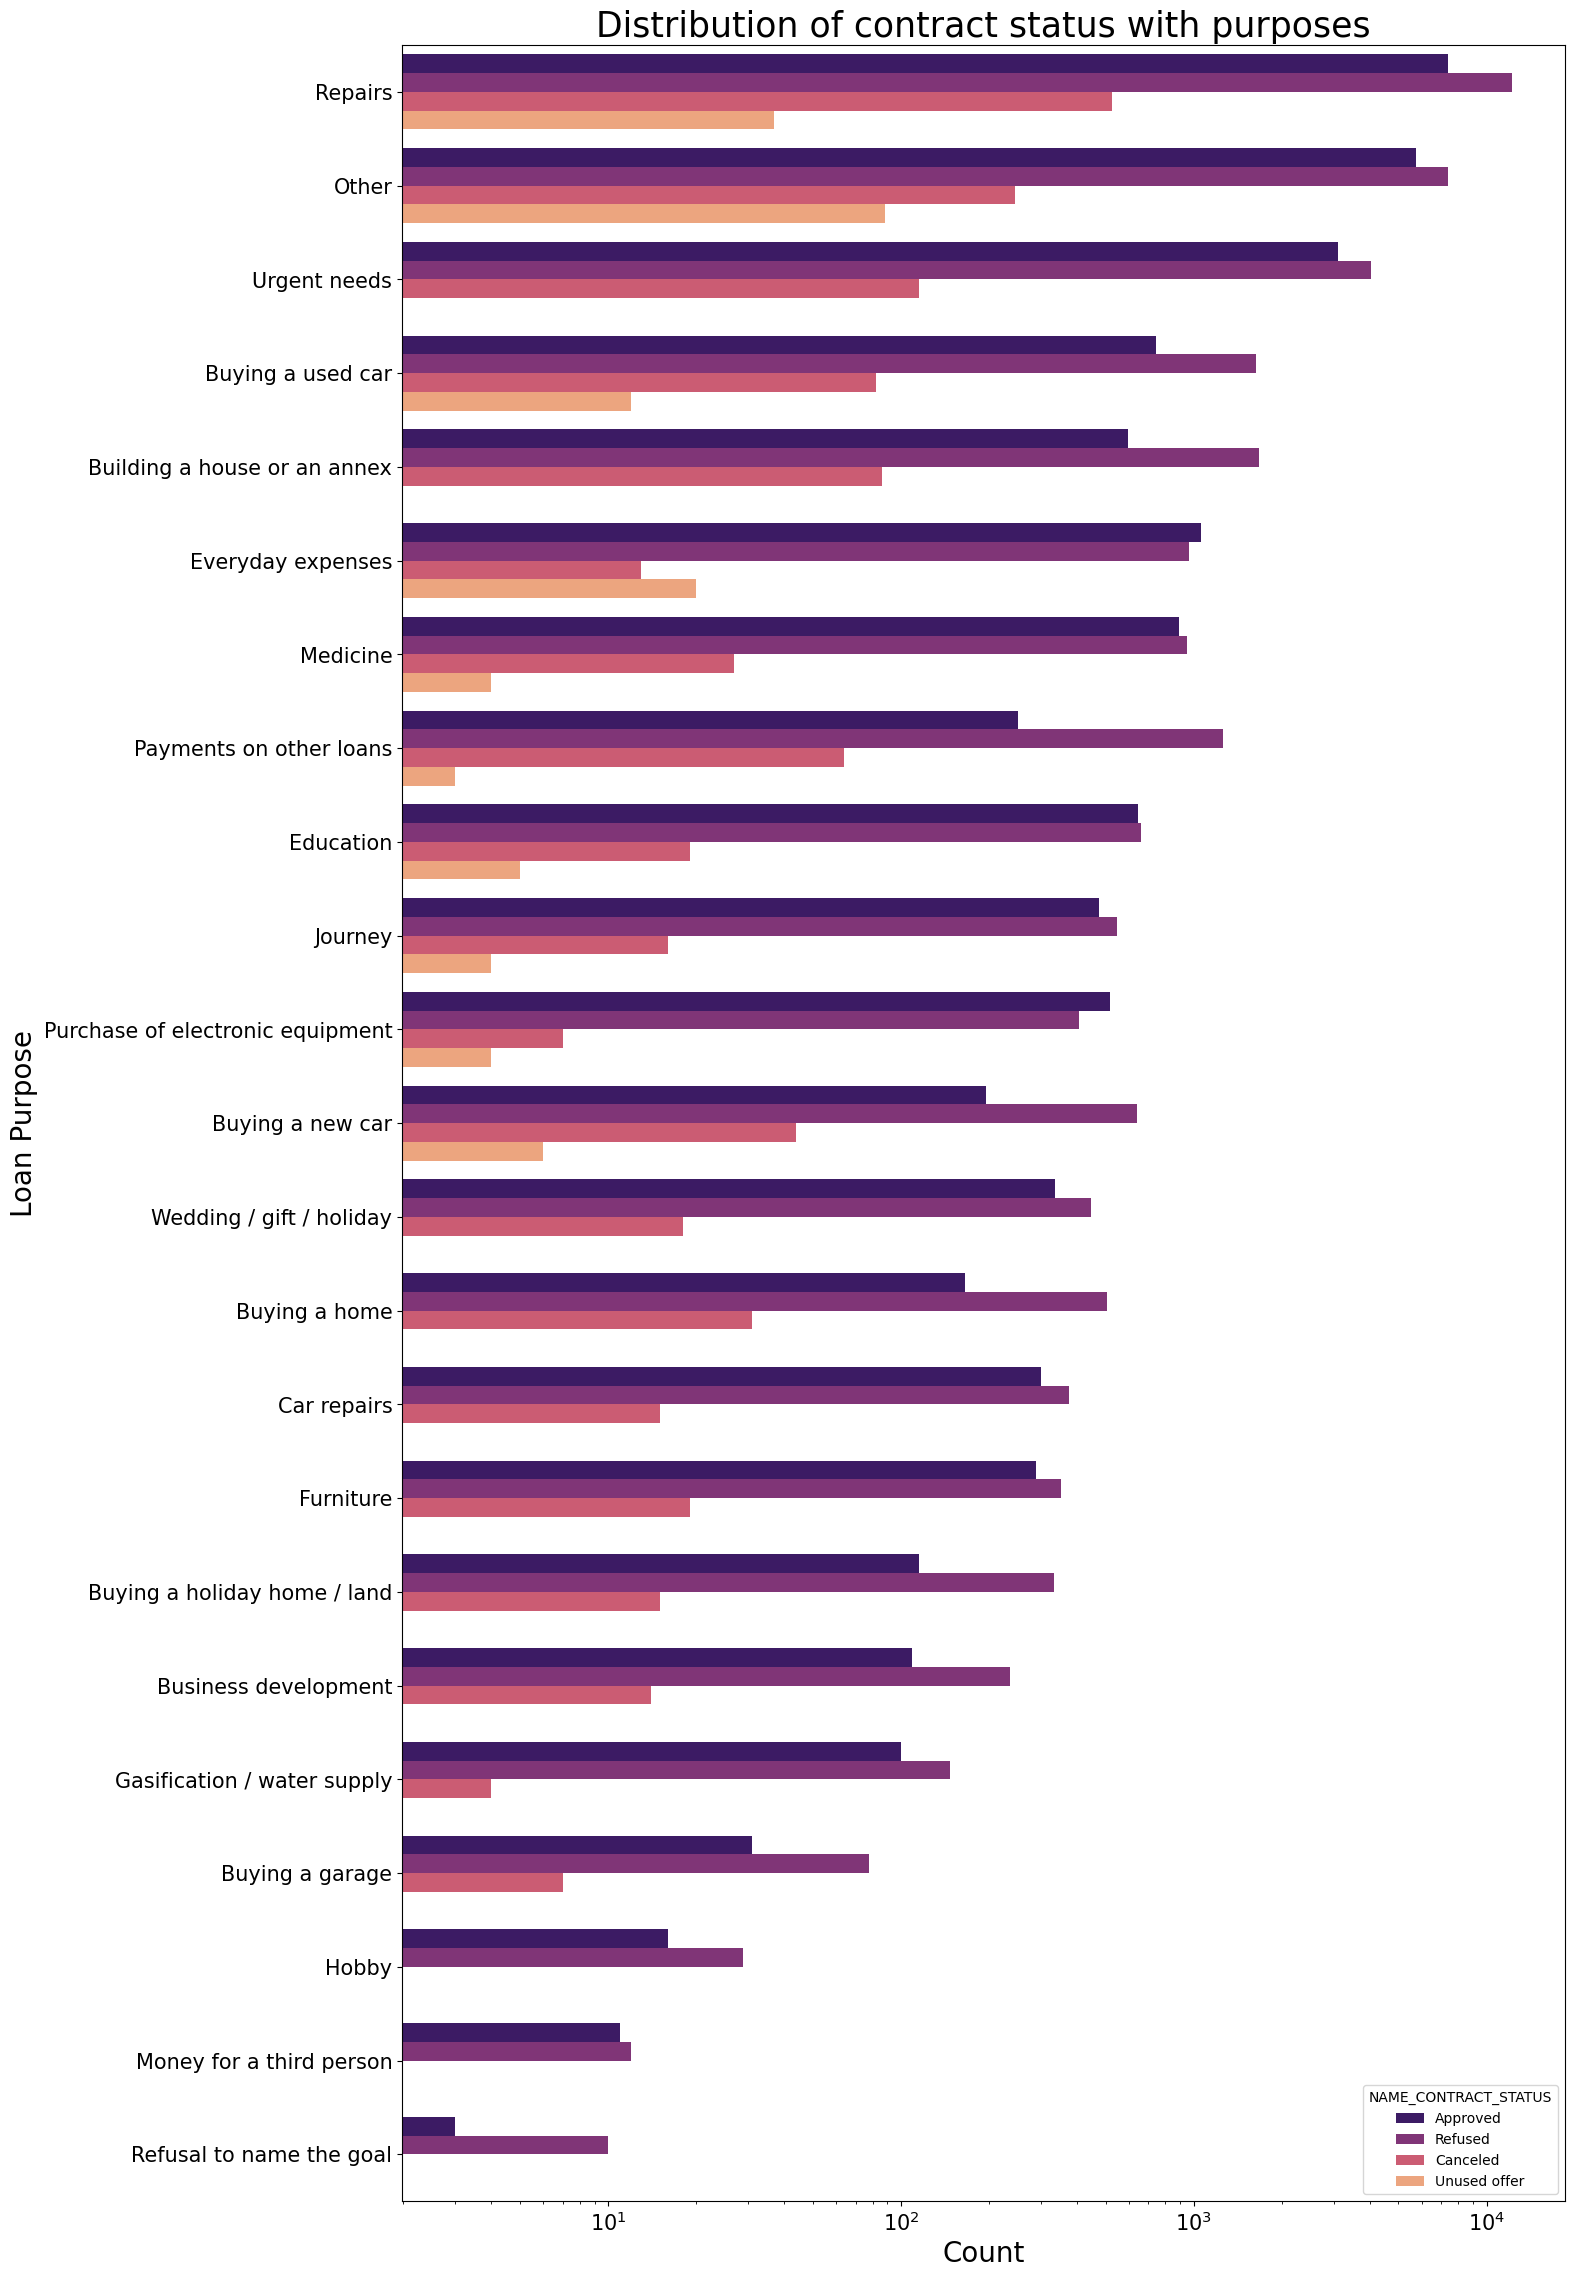

In [505]:
plt.figure(figsize=[15,28])

sns.countplot(data = merged_df, y  = 'NAME_CASH_LOAN_PURPOSE',order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of contract status with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

This chart provides insights into how borrowers' purposes correlate with contract outcomes, showing that while many loans are approved for common needs, a significant number are refused or canceled. This data helps lenders understand trends in loan approval and adjust strategies, especially for categories with high refusal rates.

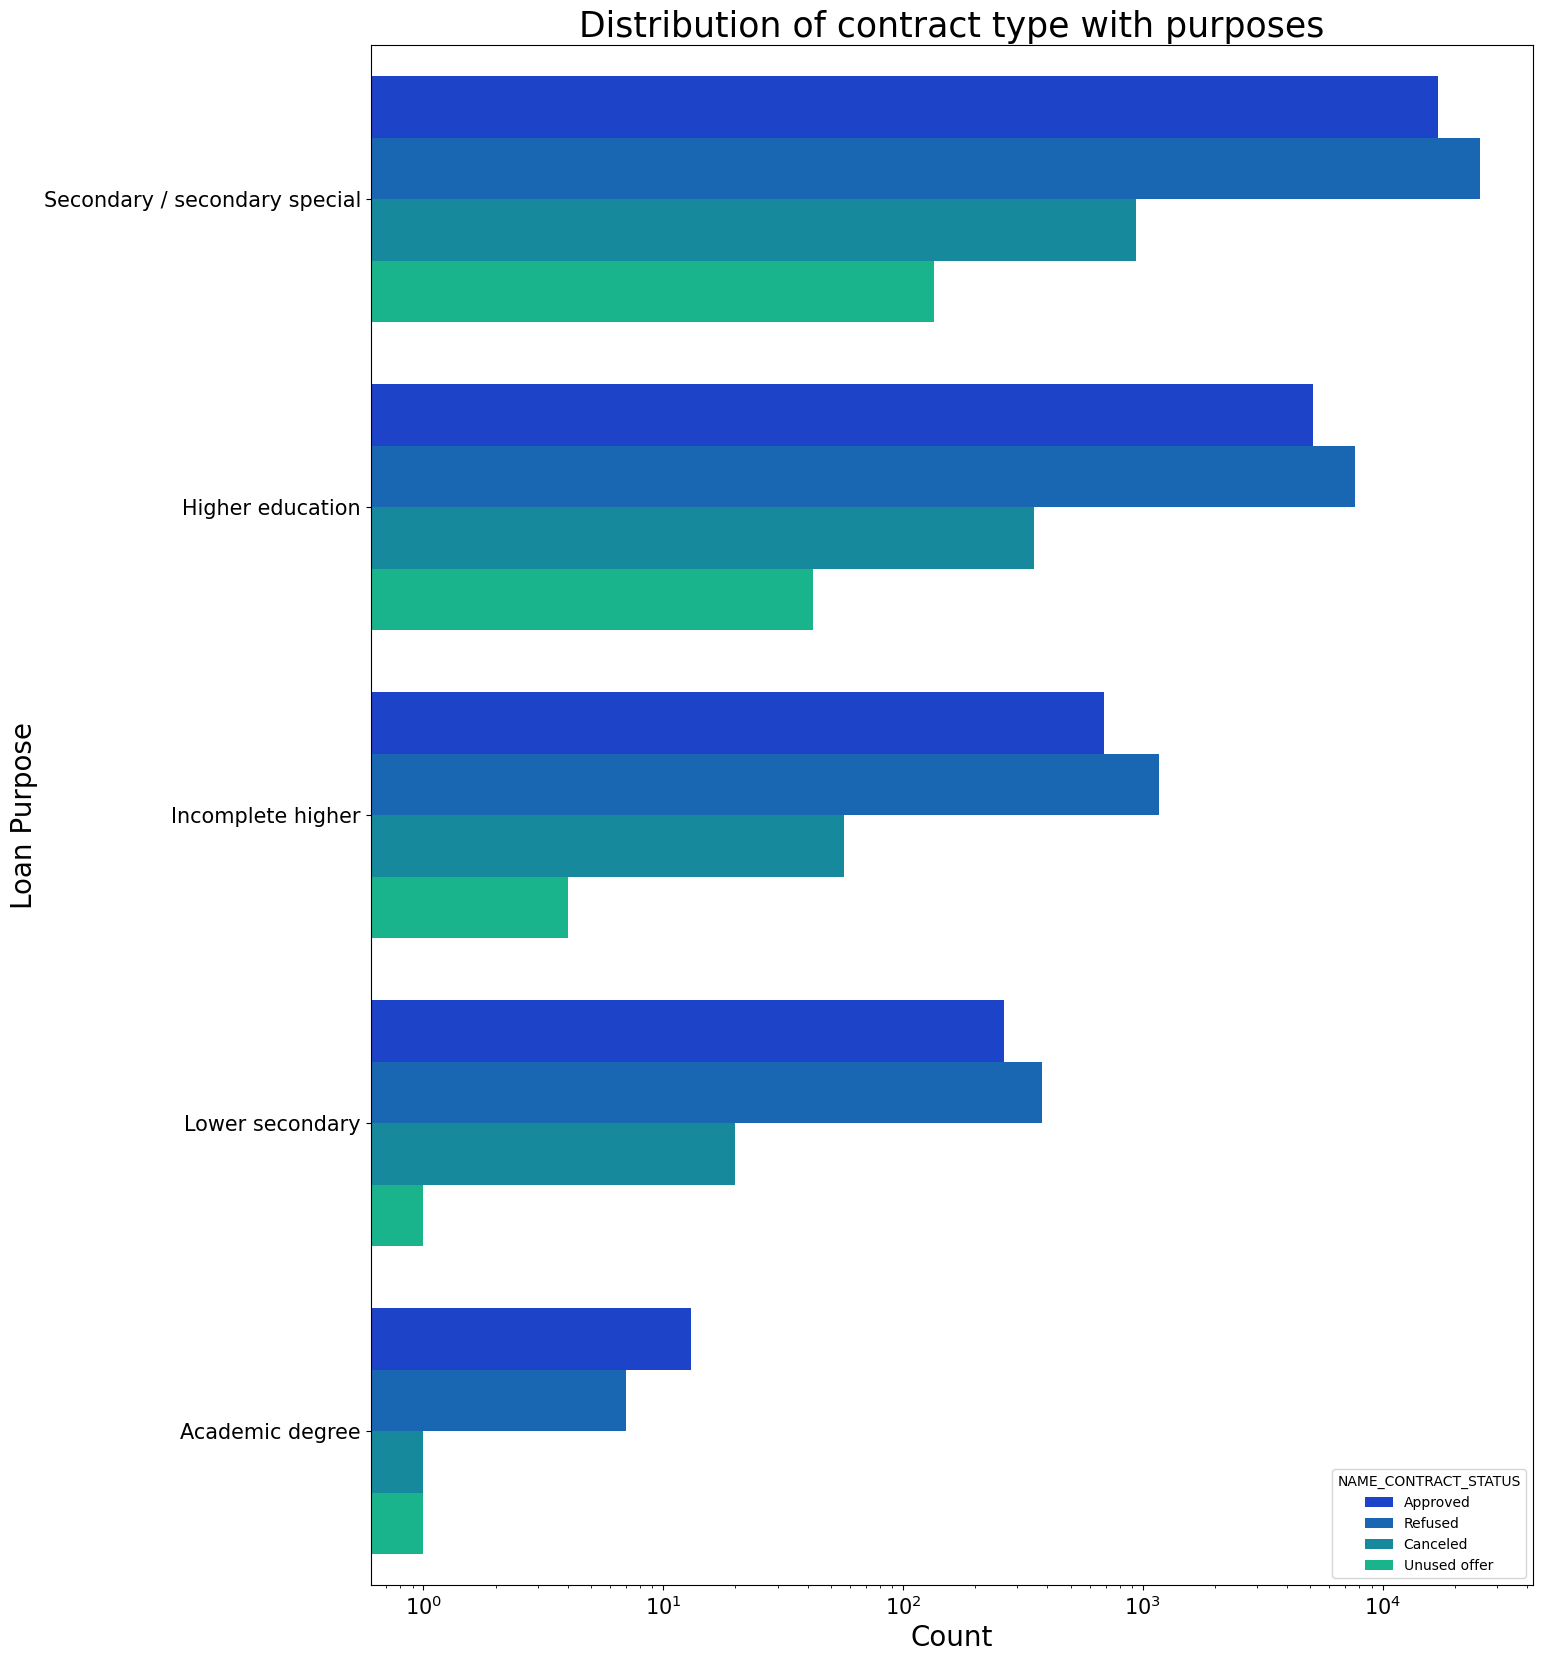

In [642]:
plt.figure(figsize=[15,20])

sns.countplot(data = merged_df, y  = 'NAME_EDUCATION_TYPE',order=merged_df['NAME_EDUCATION_TYPE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='winter')

plt.title('Distribution of contract type with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

This chart shows that loans for "Higher education" are often approved, while categories like "Lower secondary" and "Incomplete higher" face more refusals. Lenders can use this to refine strategies and address issues in these specific categories.

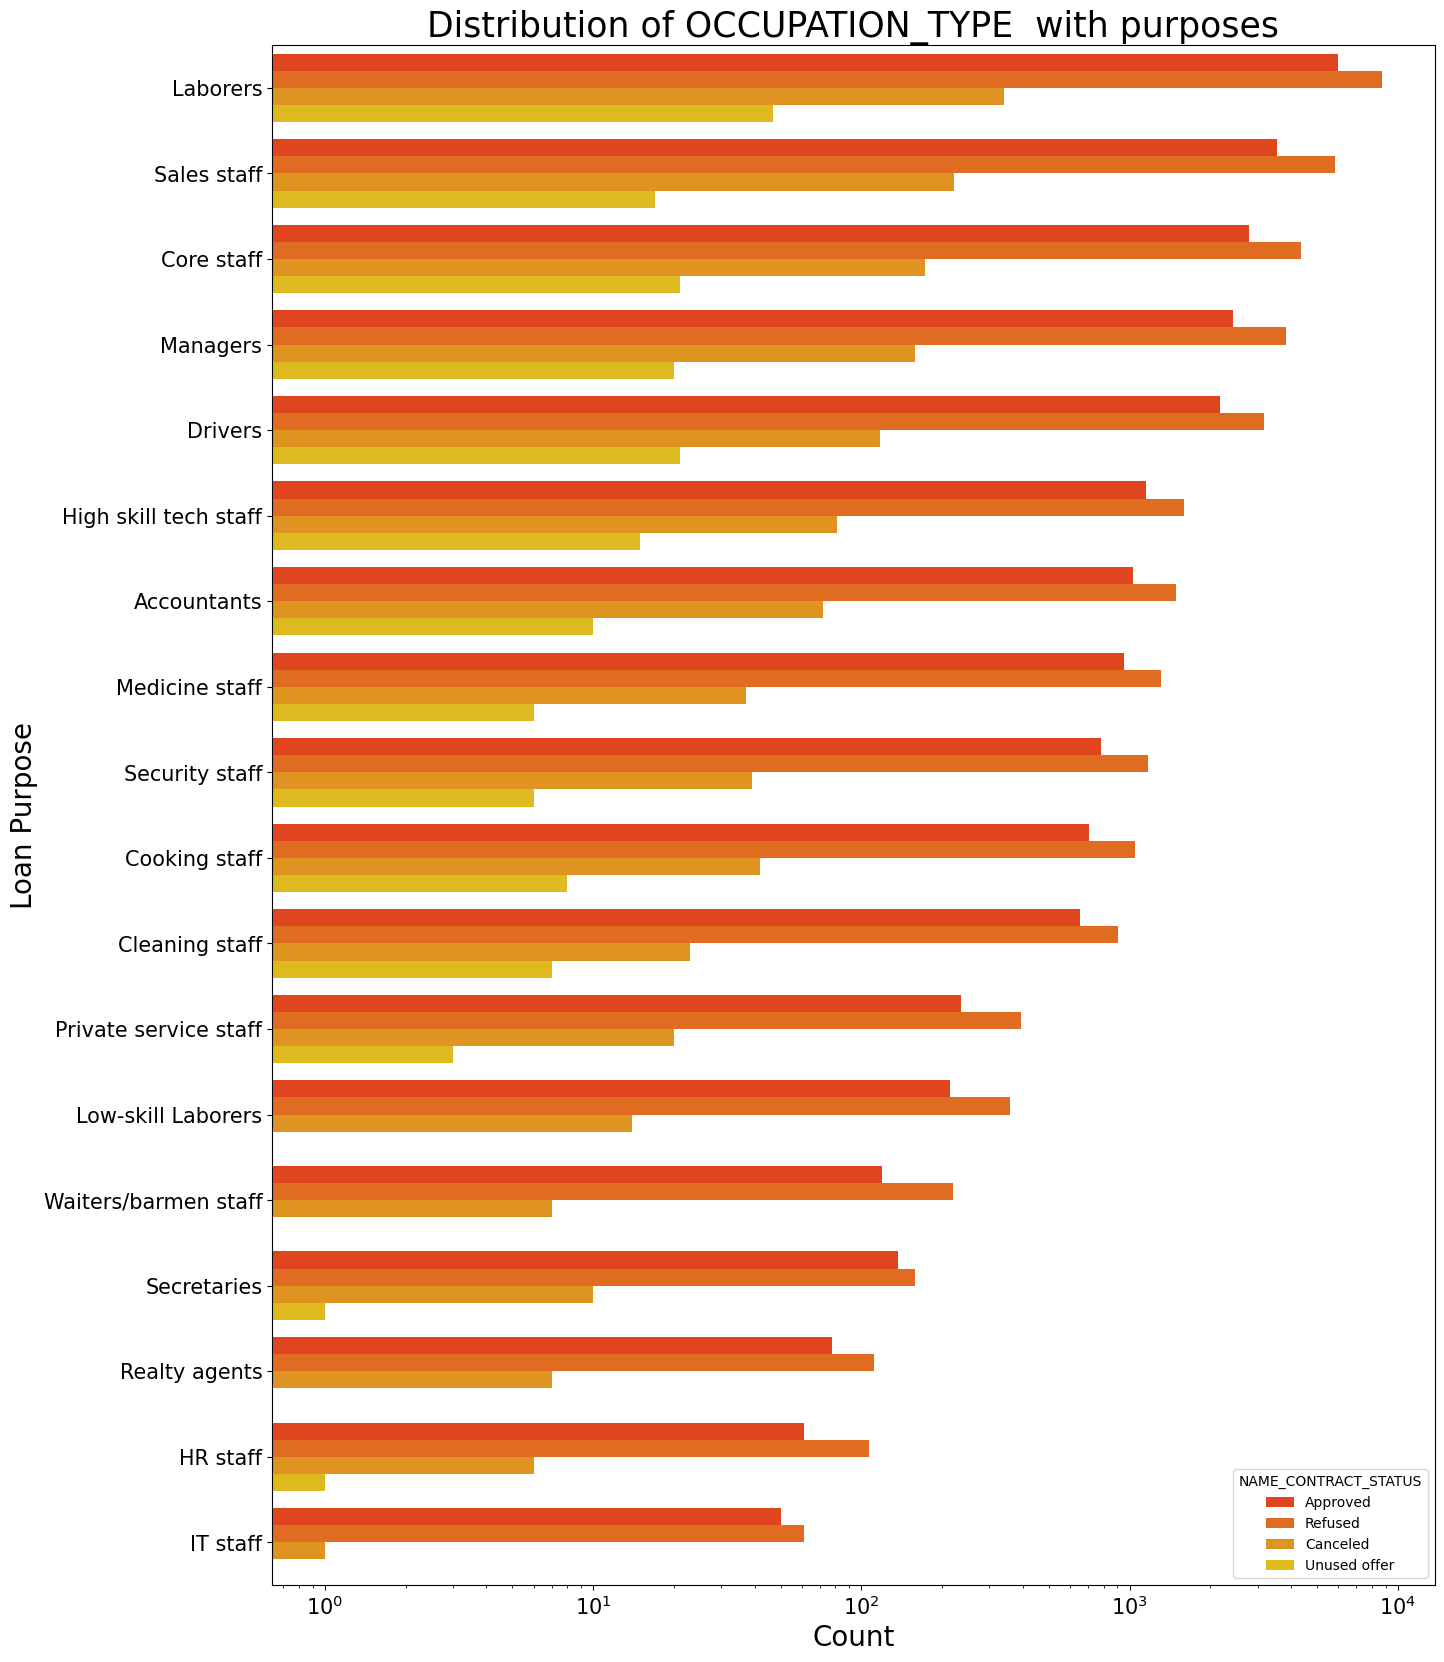

In [647]:
plt.figure(figsize=[15,20])

sns.countplot(data = merged_df, y  = 'OCCUPATION_TYPE',order=merged_df['OCCUPATION_TYPE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='autumn')

plt.title('Distribution of OCCUPATION_TYPE  with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

This bar chart shows how loan approvals and refusals vary by occupation, with labor-intensive jobs having higher approval rates and some specialized roles facing more challenges. Lenders can use this to tailor services and focus on occupations with higher refusal rates.







C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\216502166.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data =merged_df, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette='tab10',ci=False)


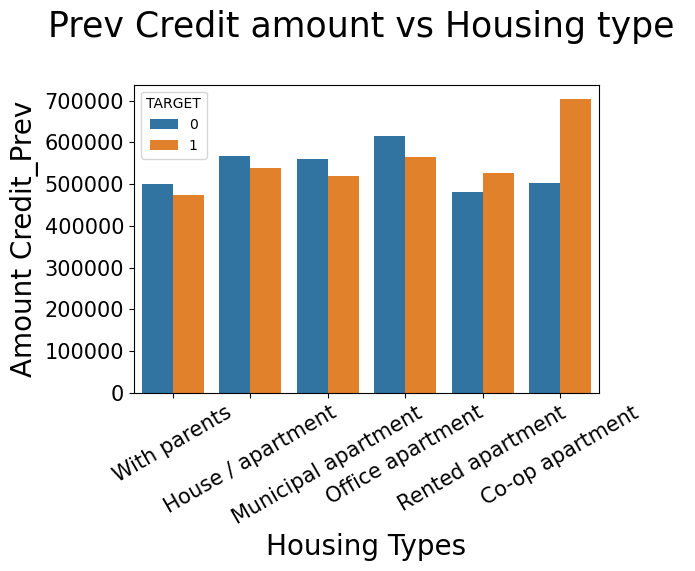

In [549]:
# Plotting for Credit amount prev vs Housing type,

plt.figure(figsize=(6,4))
plt.xticks(rotation=30)
sns.barplot(data =merged_df, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette='tab10',ci=False)
plt.title('Prev Credit amount vs Housing type \n', fontsize=25)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

This chart shows that borrowers with TARGET = 0 generally have higher previous credit amounts than those with TARGET = 1. Lenders can use this insight to tailor credit assessments based on housing type, possibly indicating a link between housing and creditworthiness.







### Abstract
This document outlines the critical columns to retain and discard in loan application datasets for analyzing loan default risk. It emphasizes the importance of key data points, such as the target variable TARGET, financial indicators, applicant characteristics, and operational data, in predicting the likelihood of default. It also identifies columns with low predictive value, such as flag indicators and non-essential demographic data, which should be removed to improve analysis accuracy.

- #### Key Points
- The TARGET variable is essential for determining whether a loan defaults.
- Key financial metrics, including AMT_CREDIT, AMT_ANNUITY, and AMT_INCOME_TOTAL, are important for assessing loan affordability and repayment capacity.
- Demographic features like CODE_GENDER and NAME_FAMILY_STATUS offer insight into the applicant's risk profile.
- Additional calculated variables, such as LOAN_INCOME_RATIO, help assess the relationship between the loan amount and the applicant's income.
- Redundant columns, such as FLAG_MOBIL and various document flags, provide little value and should be removed to streamline the dataset.
- The previous_application dataset contains historical data on loan types, statuses, and payment information, which links to the application dataset and can provide predictive insights.
- Columns with excessive missing values, such as DAYS_FIRST_DRAWING, should be excluded, as they do not contribute significantly to risk prediction.

### Factors Influencing Loan Default Risk

- Age
Young Borrowers: They often exhibit higher default rates due to limited credit history and financial management experience.
Older Borrowers: Typically have more stable incomes and better credit histories, contributing to lower default rates.

- Gender
Gender can influence financial behavior, with some studies suggesting that female borrowers may have lower default rates due to conservative financial management, though regional and cultural factors may affect this.

- Income Level
Borrowers with higher incomes generally have lower default rates because they have more financial stability. Lower-income borrowers often face greater financial strain, increasing their risk of default.

- Marital Status
Married individuals tend to have lower default rates due to combined financial resources and shared economic responsibilities. Single or divorced individuals may face greater financial challenges and higher default risks.

- Education Level
Higher education levels are typically associated with better employment prospects and income, reducing the likelihood of default. In contrast, lower education levels can correlate with unstable employment and higher default rates.

- Employment Status
Full-time, stable employment is associated with lower default rates, while part-time or unstable employment increases the risk of default due to reduced job security and income.

- Race and Ethnicity
Disparities in loan default rates among different racial and ethnic groups may reflect broader socioeconomic challenges, including access to quality jobs and wealth accumulation, which can contribute to higher default risks in certain groups.

## Conclusion
While many factors such as age, gender, income, marital status, education, and employment play an important role in predicting loan default risks, it is crucial to consider them alongside financial behavior, credit history, and broader economic conditions. A comprehensive understanding of these relationships enables lenders to make more informed decisions, optimize their risk assessments, and design targeted interventions to reduce default rates effectively.